In [1]:
%run "..\..\Startup_py3.py"
sys.path.append(r"..\..\..\..\Documents")

import ImageAnalysis3 as ia
%matplotlib notebook

from ImageAnalysis3 import *
print(os.getpid())

import h5py
from ImageAnalysis3.classes import _allowed_kwds
import ast

12804


In [2]:
import numpy as np
from cellpose import models, utils
import os
import torch
torch.cuda.set_device('cuda:0')
print(os.getpid())

dapi_im = np.load(r'\\10.245.74.158\Chromatin_NAS_1\20211129-P_brain_CTP12-RNA\Analysis\images\Conv_zscan_035_dapi.npy')

import cv2
small_dapi_im = np.array([cv2.resize(_lr, (int(2048/250*108),int(2048/250*108)), 
                           interpolation=cv2.INTER_AREA) for _lr in dapi_im])



2021-12-02 22:00:25,961 [INFO] WRITING LOG OUTPUT TO C:\Users\puzheng\.cellpose\run.log
12804
2021-12-02 22:00:27,081 [INFO] ** TORCH CUDA version installed and working. **
2021-12-02 22:00:27,082 [INFO] >>>> using GPU


In [5]:
polyt_im = np.load(r'\\10.245.74.158\Chromatin_NAS_1\20211129-P_brain_CTP12-RNA\Analysis\images\Conv_zscan_035_polyt.npy')
small_polyt_im = np.array([cv2.resize(_lr, (int(2048/250*108),int(2048/250*108)), 
                           interpolation=cv2.INTER_AREA) for _lr in polyt_im])

In [11]:
model = models.Cellpose(gpu=True, model_type='nuclei',)

#model = models.Cellpose(gpu=True, model_type='cyto2',)


2021-12-02 22:10:18,054 [INFO] ** TORCH CUDA version installed and working. **
2021-12-02 22:10:18,055 [INFO] >>>> using GPU


In [12]:
#blank_im = np.zeros(np.shape(dapi_im), dtype=np.uint16)

masks, flows, styles, diams = model.eval(#_im[:,:,:,np.newaxis],
    np.stack([small_polyt_im, small_dapi_im], axis=3),
    #np.stack([blank_im,blank_im,_im], axis=3), 
                                         channels=[0,0],
                                         anisotropy=1,
                                         diameter=40,
                                         min_size=500,
                                         stitch_threshold=0.1,
                                         resample=True,
                                         do_3D=True,
                                         )

2021-12-02 22:10:23,327 [INFO] ~~~ FINDING MASKS ~~~
2021-12-02 22:10:23,328 [INFO] multi-stack tiff read in as having 50 planes 2 channels
2021-12-02 22:10:24,541 [INFO] running YX: 50 planes of size (884, 884)
2021-12-02 22:10:40,383 [INFO] 100%|##########| 13/13 [00:03<00:00,  3.56it/s]
2021-12-02 22:10:40,977 [INFO] running ZY: 884 planes of size (50, 884)
2021-12-02 22:10:46,743 [INFO] 0%|          | 0/81 [00:00<?, ?it/s]


2021-12-02 22:11:00,774 [INFO] 54%|#####4    | 44/81 [00:02<00:02, 14.91it/s]


2021-12-02 22:11:03,226 [INFO] 100%|##########| 81/81 [00:05<00:00, 15.03it/s]
2021-12-02 22:11:04,149 [INFO] running ZX: 884 planes of size (50, 884)
2021-12-02 22:11:15,493 [INFO] 0%|          | 0/81 [00:00<?, ?it/s]


2021-12-02 22:11:26,598 [INFO] 100%|##########| 81/81 [00:05<00:00, 14.78it/s]
2021-12-02 22:11:27,508 [INFO] network run in 63.57s
2021-12-02 22:11:46,055 [INFO] masks created in 18.55s
2021-12-02 22:11:49,498 [INFO] >>>> TOTAL TIME 86.17 sec


<IPython.core.display.Javascript object>


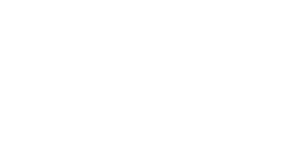

<IPython.core.display.Javascript object>


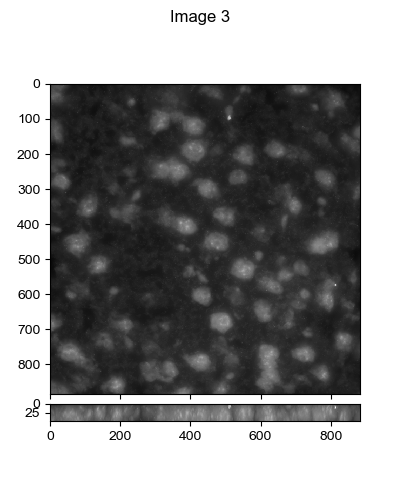

In [13]:
%run "..\..\Startup_py3.py"
sys.path.append(r"..\..\..\..\Documents")

import ImageAnalysis3 as ia
%matplotlib notebook

from ImageAnalysis3 import *

visual_tools.imshow_mark_3d_v2([masks, small_dapi_im, small_polyt_im])

In [17]:
full_masks = np.array([cv2.resize(_ly, (2048,2048), interpolation=cv2.INTER_NEAREST) for _ly in masks])

<IPython.core.display.Javascript object>


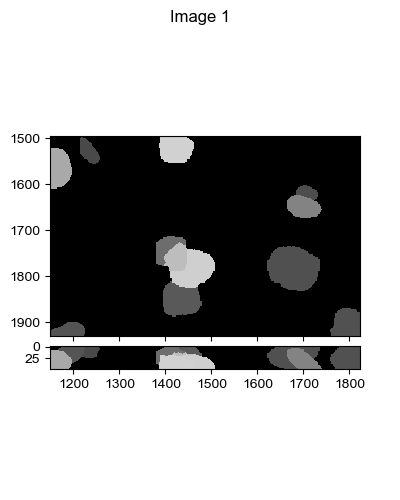

In [18]:
visual_tools.imshow_mark_3d_v2([full_masks])

In [8]:
from skimage.segmentation import watershed
from skimage.segmentation import random_walker

In [14]:
full_masks = np.array([cv2.resize(_ly, (2048,2048), interpolation=cv2.INTER_NEAREST) for _ly in masks])
new_masks = full_masks.copy().astype(np.int32)
new_masks[new_masks==0] = -1

In [31]:
new_masks = masks.copy().astype(np.int32)
new_masks[new_masks==0] = -1

In [25]:
%%time
from skimage.segmentation import random_walker
polyt_mask = random_walker(polyt_im, new_masks, beta=1, tol=0.001, prob_tol=0.001)

Wall time: 6.55 s


In [42]:
%%time
watershed_polyt_mask = watershed(small_polyt_im, new_masks, )

Wall time: 1min 20s


<IPython.core.display.Javascript object>


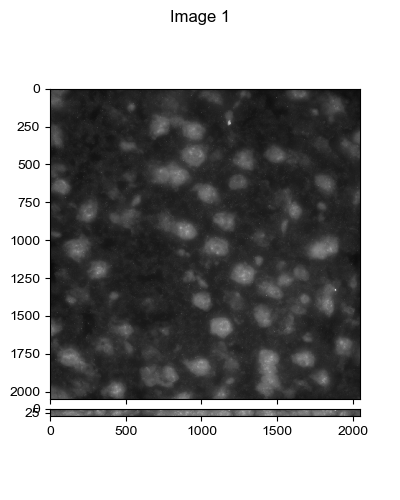

In [26]:
visual_tools.imshow_mark_3d_v2([polyt_im, polyt_mask])

In [27]:
import h5py

In [28]:
reload(ia)
reload(classes)
reload(classes.batch_functions)
reload(classes.field_of_view)
reload(io_tools.load)
reload(get_img_info)
reload(visual_tools)
reload(ia.correction_tools)
reload(ia.correction_tools.alignment)
reload(ia.spot_tools.matching)
reload(ia.segmentation_tools.chromosome)
reload(ia.spot_tools.fitting)

fov_param = {'data_folder':r'\\10.245.74.158\Chromatin_NAS_1\20211129-P_brain_CTP12-RNA',
             'save_folder':r'E:\Pu\20211129-P_brain_CTP12-RNA_warpped',
             'experiment_type': 'RNA',
             'num_threads': 12,
             'correction_folder':r'\\10.245.74.158\Chromatin_NAS_0\Corrections\20210621-Corrections_lumencor_from_60_to_50',
             'shared_parameters':{
                     'single_im_size':[50,2048,2048],
                     'distance_zxy': [250, 108, 108],
                     'corr_channels':['750','647'],
                     'num_empty_frames': 0, 
                     'num_buffer_frames':0,
                     'corr_hot_pixel':True,
                     'corr_Z_shift':True,
                     'corr_bleed':True,
                     'min_num_seeds':500,
                     'max_num_seeds': None,
                     'spot_seeding_th': 1500,
                     'normalize_intensity_local':False,
                     'normalize_intensity_background':False,
                     'corr_gaussian_highpass':True
                 }, 
             }

In [29]:
# deep: 7
# shallow: 35,36
_fov_id = 35
# create fov class
fov = classes.field_of_view.Field_of_View(fov_param, _fov_id=_fov_id,
                                          _color_info_kwargs={
                                              '_color_filename':'Color_Usage',
                                          }, 
                                          _prioritize_saved_attrs=False,
                                          _save_info_to_file=True,
                                          )

Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 14
- Number of field of views: 393
- Importing csv format color_usage file: \\10.245.74.158\Chromatin_NAS_1\20211129-P_brain_CTP12-RNA\Analysis\Color_Usage.csv
- header: ['Hyb', '750', '647', '561', '488', '405']
dict_keys(['H0R1', 'H1R2', 'H2R3', 'H3R4', 'H4R5', 'H5R6', 'H6R7', 'H7R8', 'H8R9', 'H9R10', 'H10R11', 'H11R12', 'H12R13', 'H13R14'])
- 14 folders are found according to color-usage annotation.
+ loading fov_info from file: E:\Pu\20211129-P_brain_CTP12-RNA_warpped\Conv_zscan_035.hdf5
++ base attributes loaded:['dapi_im', 'protein_ref_im', 'rna_ref_im'] in 1.594s.
+ loading correction from file: E:\Pu\20211129-P_brain_CTP12-RNA_warpped\Conv_zscan_035.hdf5
++ load bleed correction profile directly from savefile.
++ load chromatic correction profile directly from savefile.
++ load chromatic_constants correction profile directly from savefile.
++ load illumination correction profile directly from savefile.
+ loadi

In [31]:
fov._load_from_file('rna')

+ loading rna from file: E:\Pu\20211129-P_brain_CTP12-RNA_warpped\Conv_zscan_035.hdf5
++ finish loading rna in 0.051s. 


C:\Users\puzheng\Documents\Chromatin_Analysis_Scripts\Test_functions\test_Hubel\..\..\..\..\Documents\ImageAnalysis3\classes\field_of_view.py:1642: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  _spots_list = np.array([_spots[_spots[:,0] > 0] for _flg, _spots in zip(_flags, _grp['spots'][:]) if _flg > 0])


In [35]:
from ImageAnalysis3.classes.preprocess import ImageCrop
from ImageAnalysis3 import _image_size

In [45]:
def generate_neighboring_crop(coord, crop_size=8, 
                              single_im_size=_image_size,
                              sub_pixel_precision=False):
    """Function to generate crop given coord coordinate and crop size
    Inputs:
    Output:
    """
    ## check inputs
    _coord =  np.array(coord)[:len(single_im_size)]
    if isinstance(crop_size, int) or isinstance(crop_size, np.int32):
        _crop_size = np.ones(len(single_im_size),dtype=np.int32) * crop_size
    else:
        _crop_size = np.array(crop_size)[:len(single_im_size)]
        
    _single_image_size = np.array(single_im_size, dtype=np.int32)
    # find limits for this crop
    if sub_pixel_precision:
        _left_lims = np.max([_coord-_crop_size, np.zeros(len(_single_image_size))], axis=0)
        _right_lims = np.min([_coord+_crop_size, _single_image_size], axis=0)
    else:
        
        # limits
        _left_lims = np.max([np.round(_coord-_crop_size), np.zeros(len(_single_image_size))], axis=0)
        _right_lims = np.min([np.round(_coord+_crop_size), _single_image_size], axis=0)

    _crop = ImageCrop(len(single_im_size), 
                      np.array([_left_lims, _right_lims]).transpose(), 
                      single_im_size=single_im_size)

    return _crop

In [51]:
channel_2_th = {
    '750':1000,
    '647':1500,
}

rna_labels = []

for _ch, _spots in zip(fov.rna_channels,fov.rna_spots_list):
    _labels = []
    for _spot in _spots:
        _crop = generate_neighboring_crop(_spot[1:4], single_im_size=fov.shared_parameters['single_im_size'])
        _mks, _counts = np.unique(polyt_mask[_crop.to_slices()], return_counts=True)
        
        _counts = _counts[_mks>0]
        _mks = _mks[_mks>0]
        
        if _spot[0] < channel_2_th[_ch] or len(_mks) == 0:
            _labels.append(-1)
        else:
            _labels.append(_mks[np.argmax(_counts)])
            
    rna_labels.append(np.array(_labels))

In [56]:
for _cell in np.unique(polyt_mask):
    

167

In [ ]:
# get counts in each cell